In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# scikit-image: a tour

There are many tools and utilities in the package, far too many to cover in a tutorial.  This notebook is designed as a road map, to guide you as you explore or search for additional tools for your applications.

Each submodule of scikit-image has its own section, which you can navigate to below in the table of contents.

## Table of Contents

* [skimage.color](#color)
* [skimage.data](#data)
* [skimage.draw](#draw)
* [skimage.exposure](#exposure)
* [skimage.feature](#feature)
* [skimage.filters](#filters)
* [skiamge.future](#future)
* [skimage.graph](#graph)
* [skimage.io](#io)

## [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html) - color conversion<a id='color'></a>

The `color` submmodule includes routines to convert to and from common color representations.  For example, RGB (Red, Green, and Blue) can be converted into many other representations.

In [ ]:
import skimage.color as color

In [ ]:
# Tab complete to see available functions in the color submodule
color.rgb2
color.

### Example: conversion to grayscale

In [ ]:
from skimage import data
from skimage import color

original = data.astronaut()
grayscale = color.rgb2gray(original)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[0].axis('off')
ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")
ax[1].axis('off')

fig.tight_layout()
plt.show();

### Example: conversion to HSV

Usually, objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.  See below link for additional details.

https://en.wikipedia.org/wiki/HSL_and_HSV

We first load the RGB image and extract the Hue and Value channels:

In [ ]:
from skimage import data
from skimage.color import rgb2hsv

rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout();

The cup and saucer have a Hue distinct from the remainder of the image, which can be isolated by thresholding

In [ ]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout();

An additional threshold in the value channel can remote most of the shadow

In [ ]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show();

#### Additional color conversion examples available in the [online gallery](https://scikit-image.org/docs/stable/auto_examples/#manipulating-exposure-and-color-channels).

#### [Back to the Table of Contents](#Table-of-Contents)

## [skimage.data](https://scikit-image.org/docs/stable/api/skimage.data.html) - test images<a id='data'></a>

The `data` submodule includes standard test images useful for examples and testing the package.  These images are shipped with the package.

For example, scientific images:

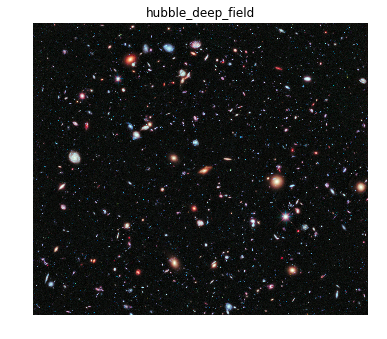

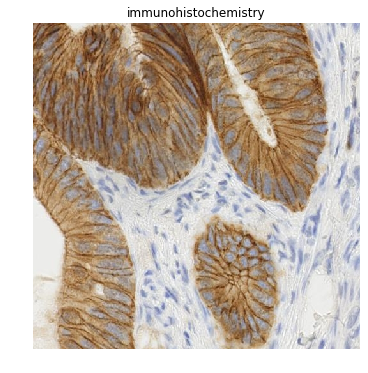

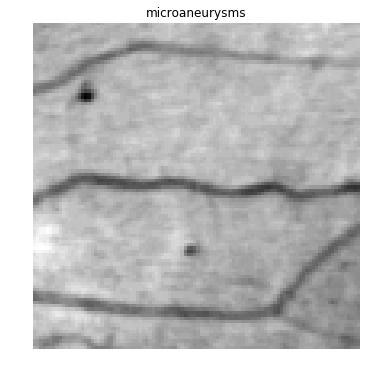

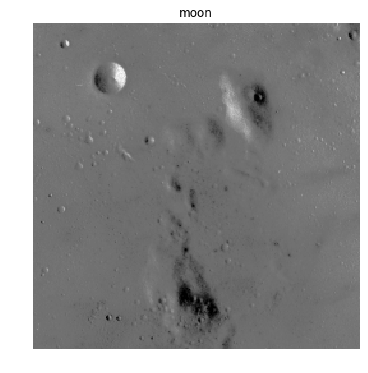

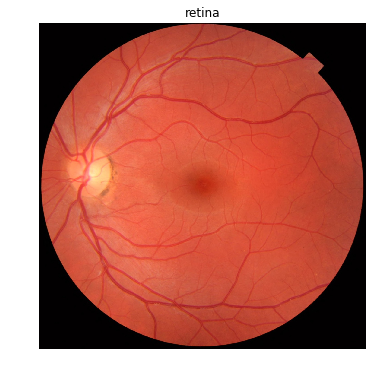

In [3]:
from skimage import data

images = ('hubble_deep_field',
          'immunohistochemistry',
          'microaneurysms',
          'moon',
          'retina',
          )

def show_named_images(image_names, figsize=(6, 6)):
    for name in images:
        caller = getattr(data, name)
        image = caller()
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title(name)
        if image.ndim == 2:
            plt.imshow(image, cmap=plt.cm.gray)
        else:
            plt.imshow(image)
        ax.axis('off');
        
show_named_images(images)

General purpose images

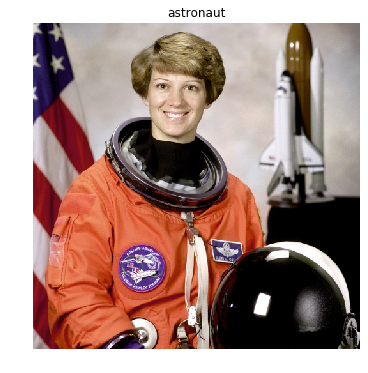

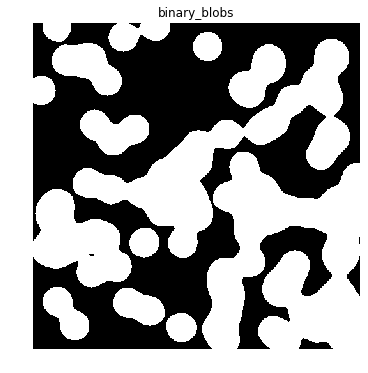

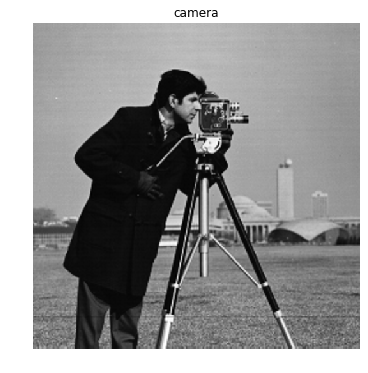

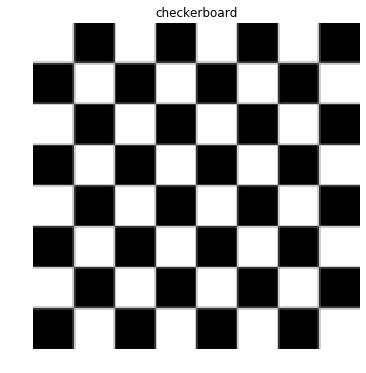

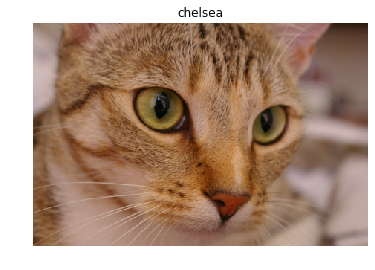

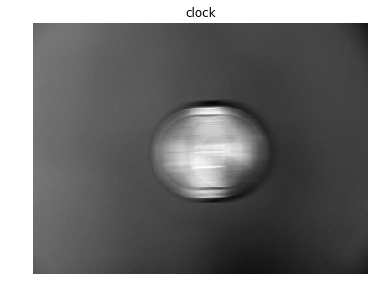

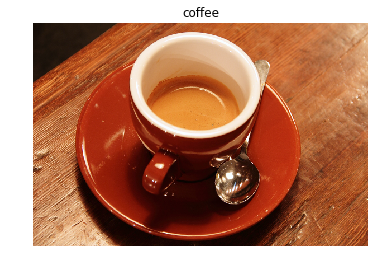

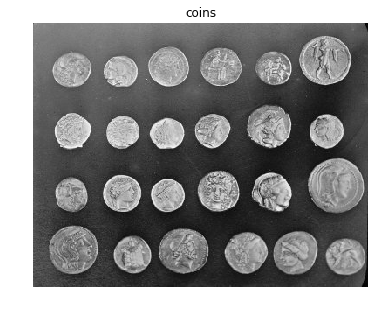

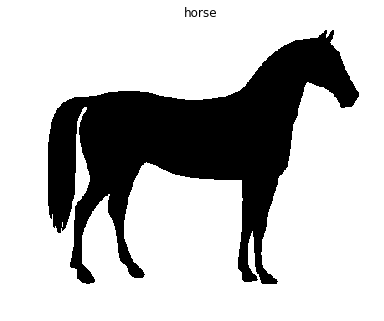

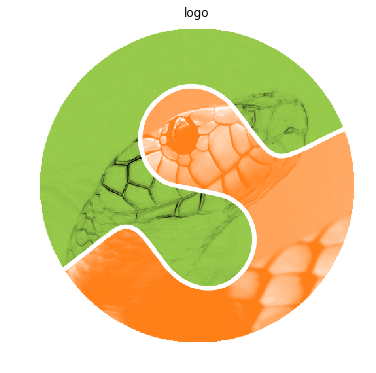

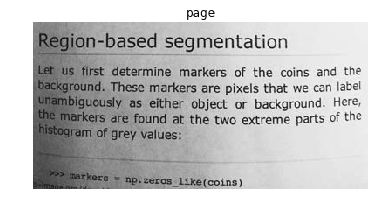

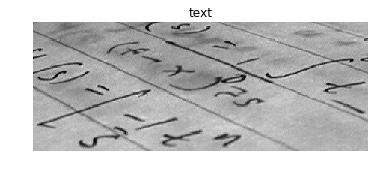

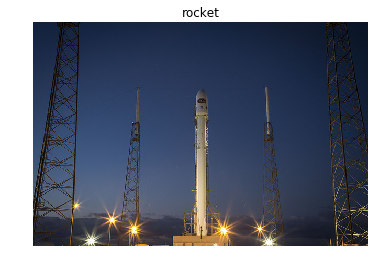

In [4]:
images = ('astronaut',
          'binary_blobs',
          'camera',
          'checkerboard',
          'chelsea',
          'clock',
          'coffee',
          'coins',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )

show_named_images(images)

And a stereoscopic image

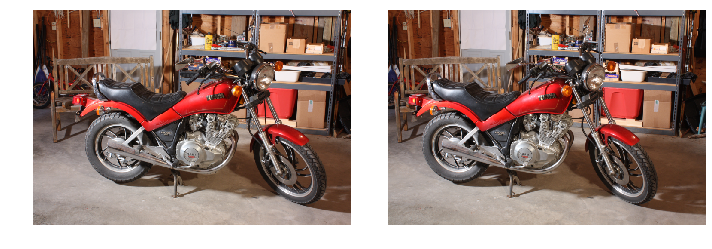

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()

stereo_images = data.stereo_motorcycle()
ax[0].imshow(stereo_images[0])
ax[0].axis('off')
ax[1].imshow(stereo_images[1])
ax[1].axis('off')

fig.tight_layout()
plt.show();

If you lean back and overlap these images, the motorcycle will pop in 3D!

-----------------------

## [skimage.draw](https://scikit-image.org/docs/stable/api/skimage.draw.html) - drawing primitives on an image<a id='draw'></a>

The majority of functions in this submodule return the *coordinates* of the specified shape/object in the image, rather than drawing it on the image directly.  The coordinates can then be used as a mask to draw on the image, or you pass the image as well as those coordinates into the convenience function `draw.set_color`.

Lines and circles can be drawn with antialiasing (these functions end in the suffix *_aa).

At the current time text is not supported; other libraries including matplotlib have robust support for overlaying text.

In [6]:
from skimage import draw

In [ ]:
# Tab complete to see available options
draw.

## Example: drawing shapes

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


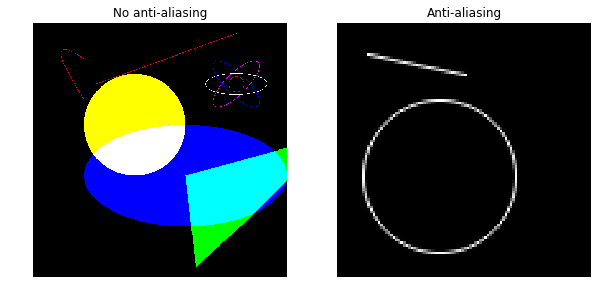

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 6))

img = np.zeros((500, 500, 3), dtype=np.float64)

# draw line
rr, cc = draw.line(120, 123, 20, 400)
img[rr, cc, 0] = 255

# fill polygon
poly = np.array((
    (300, 300),
    (480, 320),
    (380, 430),
    (220, 590),
    (300, 300),
))
rr, cc = draw.polygon(poly[:, 0], poly[:, 1], img.shape)
img[rr, cc, 1] = 1

# fill circle
rr, cc = draw.circle(200, 200, 100, img.shape)
img[rr, cc, :] = (1, 1, 0)

# fill ellipse
rr, cc = draw.ellipse(300, 300, 100, 200, img.shape)
img[rr, cc, 2] = 1

# circle
rr, cc = draw.circle_perimeter(120, 400, 15)
img[rr, cc, :] = (1, 0, 0)

# Bezier curve
rr, cc = draw.bezier_curve(70, 100, 10, 10, 150, 100, 1)
img[rr, cc, :] = (1, 0, 0)

# ellipses
rr, cc = draw.ellipse_perimeter(120, 400, 60, 20, orientation=np.pi / 4.)
img[rr, cc, :] = (1, 0, 1)
rr, cc = draw.ellipse_perimeter(120, 400, 60, 20, orientation=-np.pi / 4.)
img[rr, cc, :] = (0, 0, 1)
rr, cc = draw.ellipse_perimeter(120, 400, 60, 20, orientation=np.pi / 2.)
img[rr, cc, :] = (1, 1, 1)

ax1.imshow(img)
ax1.set_title('No anti-aliasing')
ax1.axis('off')


img = np.zeros((100, 100), dtype=np.double)

# anti-aliased line
rr, cc, val = draw.line_aa(12, 12, 20, 50)
img[rr, cc] = val

# anti-aliased circle
rr, cc, val = draw.circle_perimeter_aa(60, 40, 30)
img[rr, cc] = val


ax2.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax2.set_title('Anti-aliasing')
ax2.axis('off');

#### [Back to the Table of Contents](#Table-of-Contents)

-----------------------------------------

## [skimage.exposure](https://scikit-image.org/docs/stable/api/skimage.exposure.html) - evaluating or changing the exposure of an image<a id='exposure'></a>

One of the most common tools to evaluate exposure is the *histogram*, which plots the number of points which have a certain value against the values in order from lowest (dark) to highest (light).  The function `exposure.histogram` differs from `numpy.histogram` in that there is no rebinnning; each value along the x-axis is preserved.

### Example: Histogram equalization

In [ ]:
from skimage import data, img_as_float
from skimage import exposure


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, 
                                 sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretch')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram eq')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive eq')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout();

#### Additional examples available in the [example gallery](https://scikit-image.org/docs/stable/auto_examples/#manipulating-exposure-and-color-channels)

#### [Back to the Table of Contents](#Table-of-Contents)

----------------------

## [skimage.feature](https://scikit-image.org/docs/stable/api/skimage.feature.html) - extract features from an image<a id='feature'></a>

This submodule presents a diverse set of tools to identify or extract certain features from images, including tools for

* Edge detection
  * `feature.canny`
* Corner detection
  * `feature.corner_kitchen_rosenfeld`
  * `feature.corner_harris`
  * `feature.corner_shi_tomasi`
  * `feature.corner_foerstner`
  * `feature.subpix`
  * `feature.corner_moravec`
  * `feature.corner_fast`
  * `feature.corner_orientations`
* Blob detection
  * `feature.blob_dog`
  * `feature.blob_doh`
  * `feature.blob_log`
* Texture
  * `feature.greycomatrix`
  * `feature.greycoprops`
  * `feature.local_binary_pattern`
  * `feature.multiblock_lbp`
* Peak finding
  * `feature.peak_local_max`
* Object detction
  * `feature.hog`
  * `feature.match_template`
* Stereoscopic depth estimation
  * `feature.daisy`
* Feature matching
  * `feature.ORB`
  * `feature.BRIEF`
  * `feature.CENSURE`
  * `feature.match_descriptors`
  * `feature.plot_matches`


In [ ]:
from skimage import feature

In [ ]:
# Explore with tab completion
feature.

This is a large submodule.  For brevity here is a short example illustrating ORB feature matching, and additional examples can be explored in the [online gallery](https://scikit-image.org/docs/stable/auto_examples/index.html#detection-of-features-and-objects).

In [ ]:
from skimage import data
from skimage import transform as tf
from skimage import feature
from skimage.color import rgb2gray

# Import the astronaut then warp/rotate the image
img1 = rgb2gray(data.astronaut())
img2 = tf.rotate(img1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img1, tform)

# Build ORB extractor and extract features
descriptor_extractor = feature.ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

# Find matches between the extracted features
matches12 = feature.match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = feature.match_descriptors(descriptors1, descriptors3, cross_check=True)

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

plt.gray()

feature.plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')
ax[0].set_title("Original Image vs. Transformed Image")

feature.plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')
ax[1].set_title("Original Image vs. Transformed Image");

#### Additional feature detection and extraction examples available in the [online gallery](https://scikit-image.org/docs/stable/auto_examples/index.html#detection-of-features-and-objects).

#### [Back to the Table of Contents](#Table-of-Contents)

---------------------------

## [skimage.filters](https://scikit-image.org/docs/stable/api/skimage.filters.html) - apply filters to an image<a id='filters'></a>

Filtering applies whole-image modifications such as sharpening or blurring.  Thresholding methods also live in this submodule.

Notable functions include (links to relevant gallery examples)

* [Thresholding](https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html)
  * filters.threshold_* (multiple different functions with this prefix)
  * skimage.filters.try_all_threshold to compare various methods
* [Edge finding/enhancement](https://scikit-image.org/docs/stable/auto_examples/edges/plot_edge_filter.html)
  * filters.sobel
  * filters.prewitt
  * filters.scharr
  * filters.roberts
  * filters.laplace
  * filters.hessian
* [Ridge filters](https://scikit-image.org/docs/stable/auto_examples/edges/plot_ridge_filter.html)
  * filters.meijering
  * filters.sato
  * filters.frangi
* Inverse filtering (see also skimage.restoration)
  * filters.weiner
  * filters.inverse
* [Directional](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_gabor.html)
  * filters.gabor
* Blurring/denoising
  * filters.gaussian
  * filters.median
* [Sharpening](https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html)
  * filters.unsharp_mask
* Define your own
  * LPIFilter2D

In [ ]:
from skimage import filters

In [ ]:
# Explore with tab completion
filters.

### Rank filters
There is an additional sub-submodule, `skimage.filters.rank`, which contains rank filters.  These filters are nonlinear and operate on the local histogram.

To learn more about the rank filters, see the comprehensive [gallery example for rank filters](https://scikit-image.org/docs/stable/auto_examples/applications/plot_rank_filters.html).

#### Additional feature detection and extraction examples available in the [online gallery](https://scikit-image.org/docs/stable/auto_examples/index.html#detection-of-features-and-objects).

#### [Back to the Table of Contents](#Table-of-Contents)

---------------------------

## [skimage.future](https://scikit-image.org/docs/stable/api/skimage.future.html) - stable code with unstable API<a id='future'></a>

Bleeding edge features which work well, and will be moved from here into the main package in future releases.  However, on the way their API may change.

#### [Back to the Table of Contents](#Table-of-Contents)

------------------------------

## [skimage.graph](https://scikit-image.org/docs/stable/api/skimage.graph.html) - graph theory, minimum cost paths<a id='graph'></a>

Graph theory.  Currently this submodule primarily deals with a constructed "cost" image, and how to find the minimum cost path through it, with constraints if desired.

[The panorama tutorial lecture illustrates a real-world example.](./solutions/adv3_panorama-stitching-solution.ipynb)

#### [Back to the Table of Contents](#Table-of-Contents)

------------------------

## [skimage.io](https://scikit-image.org/docs/stable/api/skimage.io.html) - utilities to read and write images in various formats<a id='io'></a>

Reading your image and writing the results back out.  There are multiple plugins available, which support multiple formats.  The most commonly used functions include

* io.imread - Read an image to a numpy array.
* io.imsave - Write an image to disk.
* io.imread_collection - Read multiple images which match a common prefix


#### [Back to the Table of Contents](#Table-of-Contents)

------------------------------